In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import cv2
from PIL import Image
import zipfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [4]:
original_model = YOLO('/content/drive/My Drive/BME548_Final/original.pt')
scale_model = YOLO('/content/drive/My Drive/BME548_Final/scale.pt')
illu_rot_model = YOLO('/content/drive/My Drive/BME548_Final/illu_rotate.pt')
occu_model = YOLO('/content/drive/My Drive/BME548_Final/random_box.pt')

In [5]:
zip_file_path = '/content/drive/My Drive/BME548_Final/recognition_data.zip'
extract_path = '/content/YOLO_data'
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
zip_file_path = '/content/drive/My Drive/BME548_Final/recognition_illu_rot.zip'
extract_path = '/content/YOLO_data'
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
zip_file_path = '/content/drive/My Drive/BME548_Final/recognition_scale.zip'
extract_path = '/content/YOLO_data'
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
zip_file_path = '/content/drive/My Drive/BME548_Final/recognition_random_box.zip'
extract_path = '/content/YOLO_data'
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [11]:
image = os.listdir('/content/YOLO_data/recognition_data/YOLO_format/test/Anger')[0]
image_path = '/content/YOLO_data/recognition_data/YOLO_format/test/Anger/' + image

In [13]:
def show_occulation(image_path, model, H, W):
  imag = cv2.imread(image_path)
  image = cv2.resize(imag, (300, 300))
  w = image.shape[0]
  h = image.shape[1]
  length = 50
  stride = 3
  cropped = image.copy()
  cropped[H:H + length, W:W + length] = 0
  prediction = model.predict(source=cropped.copy(), show=False, verbose=False)
  conf_m = np.zeros([int((w-length)/stride+1),int((h-length)/stride+1)])
  for i in range(0, int((w-length)/stride+1)):
      for j in range(0, int((h-length)/stride+1)):
          cropped = image.copy()
          cropped[i*stride:(i*stride+length), j*stride:(j*stride+length)] = 0
          prediction = model.predict(source=cropped, show=False, verbose=False)
          conf_m[i,j] = image[i,j,1]
          conf_m[i,j] = prediction[0].probs.data[0]

  padding = int(length/2)
  conf = cv2.resize(conf_m, (h-length, w-length))
  padded = cv2.copyMakeBorder(conf, padding, padding, padding, padding, cv2.BORDER_REPLICATE)
  return padded

In [14]:
padded = show_occulation(image_path, original_model, 75,75)

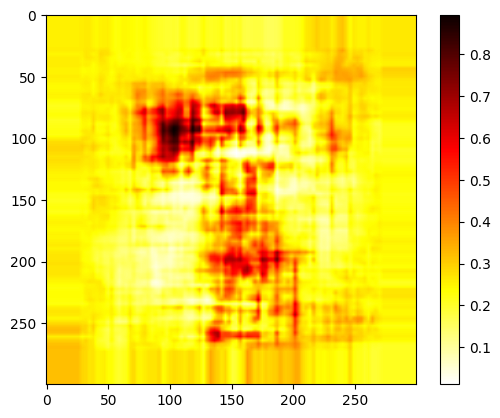

In [15]:
plt.imshow(padded, cmap='hot_r')
plt.colorbar()